In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

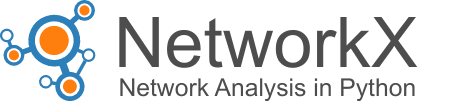

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
import os,re

In [ ]:
import networkx as nx

In [ ]:
data=pd.read_csv('../input/github-organizations-social-network-analysis/organization.csv')

### Drawing the Graph 🕸

In [ ]:
from networkx.algorithms import bipartite
B=nx.Graph()
B.add_nodes_from(data['Organisation'],bipartite=0)
B.add_nodes_from(data['member'],bipartite=1)
for i in range(len(data)):
  B.add_edges_from([(data.iloc[i,1],data.iloc[i,0])])
# nx.draw(B,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(B, with_labels=True, node_size=1)
plt.show()

### Closeness Centrality 🤗

In [ ]:
cc=nx.closeness_centrality(B, u=None, distance=None, wf_improved=True)
cc

### Finding Cliques in the Graph

In [ ]:
cliques=nx.find_cliques(B)
for cl in cliques:
  print(cl)

### Drawing a Max Bipartite Clique

In [ ]:
max_clique_biparti=nx.make_clique_bipartite(B, fpos=None, create_using=None, name=None)
options = {"edgecolors": "black", "node_size": 100, "alpha": 0.9}
nx.draw(max_clique_biparti,node_color="yellow",**options)

### Local Bridges

In [ ]:
lb=nx.local_bridges(B)
sum=0
for bridge in lb:
    sum=sum+1
print("Number of Local Bridges are:",sum)